## Running LoFTR in Tensorflow

In [2]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.cm as cm

from src.configs.getConfig import giveConfig
from src.loftr.utils.plotting_TF import make_matching_figure

try:
  os.chdir("LoFTR-in-Tensorflow")
except:
  print("Directory is fine")

print(tf.__version__)
print(tf.keras.__version__)

_,config = giveConfig()
config = config['loftr']

2.10.0
2.10.0


## Outdoor Example

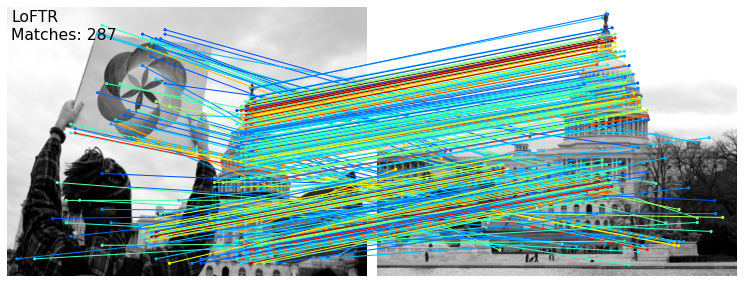

In [5]:
from src.loftr.LoFTR_TF import LoFTR

#Creating the matcher 
matcher = LoFTR(config)
matcher.load_weights("./weights/other/cp_smallMegadepth.ckpt")

#loading in the images for the current batch
img0_pth = "./other/capitolTest1.jpg"
img1_pth = "./other/capitolTest2.jpg"
img0_raw = cv.imread(img0_pth, cv.IMREAD_GRAYSCALE)
img1_raw = cv.imread(img1_pth, cv.IMREAD_GRAYSCALE)
img0_raw = cv.resize(img0_raw, (640, 480))
img1_raw = cv.resize(img1_raw, (640, 480))

img0 = tf.convert_to_tensor(img0_raw)[None][None]/255
img1 = tf.convert_to_tensor(img1_raw)[None][None]/255

data = {'image0': img0, 'image1': img1}

#Calling the matcher on the current batch
updata = matcher(data)

#Extracting matches
mkpts0 = updata['mkpts0_f'].numpy()
mkpts1 = updata['mkpts1_f'].numpy()
mconf = updata['mconf'].numpy()

color = cm.jet(mconf)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)),
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text=text)

## Indoor Example (scannet)

In [ ]:
from src.loftr.LoFTR_TF import LoFTR

#Creating the matcher 
matcher = LoFTR(config)
matcher.load_weights("./weights/scannet/cp_SCANNET.ckpt")

#loading in the images for the current batch
img0_pth = "scene0738_00_frame-000885.jpg"
img1_pth = "scene0738_00_frame-001065.jpg"
img0_raw = cv.imread(img0_pth, cv.IMREAD_GRAYSCALE)
img1_raw = cv.imread(img1_pth, cv.IMREAD_GRAYSCALE)
img0_raw = cv.resize(img0_raw, (640, 480))
img1_raw = cv.resize(img1_raw, (640, 480))

img0 = tf.convert_to_tensor(img0_raw)[None][None]/255
img1 = tf.convert_to_tensor(img1_raw)[None][None]/255

data = {'image0': img0, 'image1': img1}

#Calling the matcher on the current batch
updata = matcher(data)


#Extracting matches
mkpts0 = updata['mkpts0_f'].numpy()
mkpts1 = updata['mkpts1_f'].numpy()
mconf = updata['mconf'].numpy()

color = cm.jet(mconf)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)),
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text=text)

## Indoor Example (NYU)


In [ ]:
from src.loftr.LoFTR_TF import LoFTR

#Creating the matcher 
matcher = LoFTR(config)
matcher.load_weights("./weights/NYU/cp_nyu.ckpt")

#loading in the images for the current batch
img0_pth = "scene0738_00_frame-000885.jpg"
img1_pth = "scene0738_00_frame-001065.jpg"
img0_raw = cv.imread(img0_pth, cv.IMREAD_GRAYSCALE)
img1_raw = cv.imread(img1_pth, cv.IMREAD_GRAYSCALE)
img0_raw = cv.resize(img0_raw, (640, 480))
img1_raw = cv.resize(img1_raw, (640, 480))

img0 = tf.convert_to_tensor(img0_raw)[None][None]/255
img1 = tf.convert_to_tensor(img1_raw)[None][None]/255

data = {'image0': img0, 'image1': img1}

#Calling the matcher on the current batch
updata = matcher(data)


#Extracting matches
mkpts0 = updata['mkpts0_f'].numpy()
mkpts1 = updata['mkpts1_f'].numpy()
mconf = updata['mconf'].numpy()

color = cm.jet(mconf)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)),
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text=text)